In [1]:
from superfv import AdvectionSolver, initial_conditions
from functools import partial
import matplotlib.pyplot as plt

In [2]:
N = 128
p = 3

solver = AdvectionSolver(
    ic=partial(initial_conditions.sinus, vx=1),
    nx=N,
    p=p,
    ZS=True,
    adaptive_timestepping=False,
    SED=True,
)
solver.run(1.0)

100%|██████████| 1.0/1.0 [00:01]                 


Text(0, 0.5, 'Error in density')

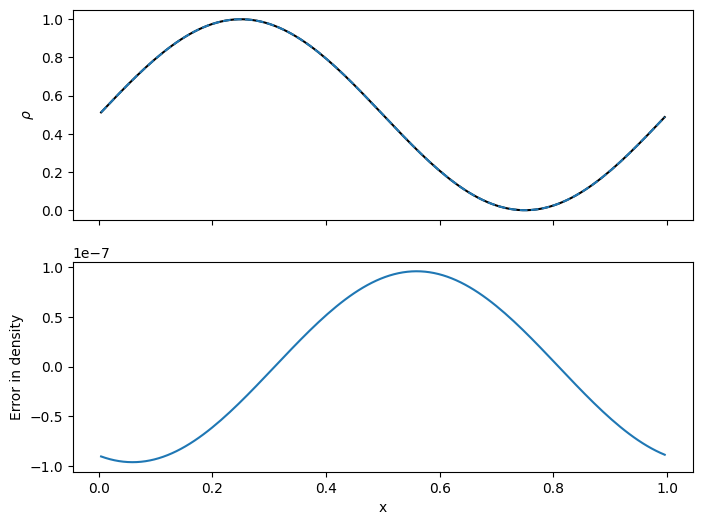

In [3]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 6))

_slc = solver.array_slicer
rho_numerical = solver.snapshots[-1]["wcc"][_slc("rho")].flatten()
rho_analytical = initial_conditions.sinus(_slc, solver.X, solver.Y, solver.Z, P=0)[
    _slc("rho")
].flatten()

axs[0].set_ylabel(r"$\rho$")
solver.plot_1d_slice(axs[0], "rho", array="wcc", x=None, t=0, color="k", label="t=0")
solver.plot_1d_slice(axs[0], "rho", array="wcc", x=None, linestyle="--", label="t=1")

axs[1].plot(solver.x, rho_numerical - rho_analytical)
axs[1].set_xlabel("x")
axs[1].set_ylabel("Error in density")